In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:

df = pd.read_csv("Final_data.csv")
df.head()


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [ ]:
#EDA
df.shape


(20000, 54)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

In [ ]:
df.isnull().sum()


,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0


In [ ]:
df.describe()


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),...,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04
mean,38.851453,73.898832,1.723093,179.889702,143.704306,62.195813,1.259446,1280.109600,26.101313,2.627485,...,24.921651,1998.297076,0.499983,1.460142,0.699005,0.802305,744.308699,53.786384,866.352318,8.631802e+19
std,12.114580,21.173010,0.127033,11.510805,14.267688,7.289351,0.341336,502.228982,4.996160,0.604724,...,6.701144,440.848408,0.001455,0.518946,0.144880,0.096613,720.946619,12.498740,250.317069,3.197579e+19
min,18.000000,39.180000,1.490000,159.310000,119.070000,49.490000,0.490000,323.110000,11.333134,1.460000,...,12.037907,1105.570000,0.492434,0.516706,0.371344,0.599789,-1266.220000,30.946261,219.852800,2.491905e+16
25%,28.170000,58.160000,1.620000,170.057500,131.220000,55.960000,1.050000,910.800000,22.387807,2.170000,...,20.094975,1661.022500,0.499054,1.076294,0.583656,0.727676,261.432500,44.587037,714.098250,6.441978e+19
50%,39.865000,70.000000,1.710000,180.140000,142.990000,62.200000,1.270000,1231.450000,25.822504,2.610000,...,24.119097,1943.130000,0.499981,1.382260,0.686284,0.794834,691.190000,51.204908,868.721400,8.371578e+19
75%,49.630000,86.100000,1.800000,189.425000,156.060000,68.090000,1.460000,1553.112500,29.676026,3.120000,...,28.562620,2271.950000,0.500910,1.750495,0.798196,0.869211,1176.290000,61.939016,1012.532700,1.100442e+20
max,59.670000,130.770000,2.010000,199.640000,169.840000,74.500000,2.020000,2890.820000,35.000000,3.730000,...,50.229544,3699.540000,0.507889,3.916881,1.073939,1.047032,3075.580000,90.117371,1477.108800,1.756614e+20


In [ ]:
#Target variable selection
target = "Calories_Burned"
target


'Calories_Burned'

In [ ]:
df.select_dtypes(include="object").columns


Index(['Gender', 'Workout_Type', 'meal_name', 'meal_type', 'diet_type',
       'cooking_method', 'Name of Exercise', 'Benefit', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout', 'Burns_Calories_Bin'],
      dtype='object')

In [ ]:
df = pd.get_dummies(df, drop_first=True)


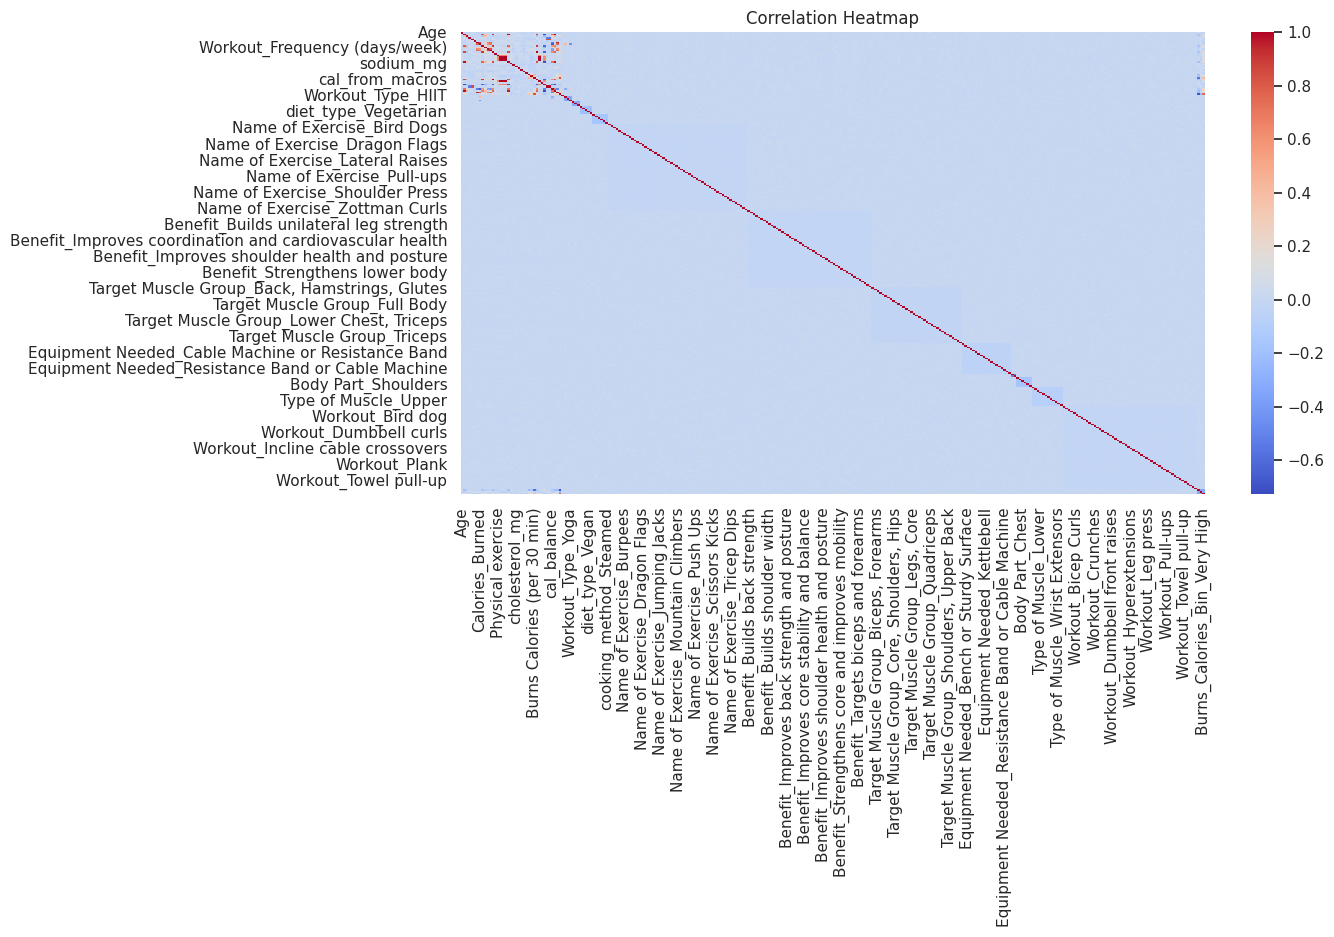

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
#defining features and columns , model making
X = df.drop(columns=[target])
y = df[target]


In [ ]:
#train test data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Model prediction on unseen test data
y_pred = model.predict(X_test)

# Comparing few actual vs predicted values
result = pd.DataFrame({
    "Actual Calories": y_test.values[:10],
    "Predicted Calories": y_pred[:10]
})

result


,Actual Calories,Predicted Calories
0,825.93,825.93
1,1335.85,1335.85
2,864.75,864.75
3,1257.26,1257.26
4,758.86,758.86
5,1478.37,1478.37
6,1394.05,1394.05
7,1229.82,1229.82
8,785.45,785.45
9,1039.34,1039.34


In [ ]:
# doing model evaluation
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R2 Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)


R2 Score: 1.0
MAE: 2.0154118374193786e-12
RMSE: 2.5459681234140218e-12


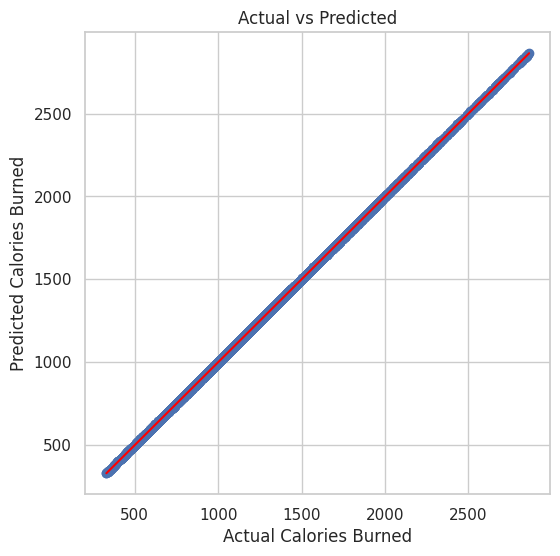

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Calories Burned")
plt.ylabel("Predicted Calories Burned")
plt.title("Actual vs Predicted")

plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red"
)

plt.show()
